# Sales Prediction Using Python

## Understanding The Problem

#### Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.

#### Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let's start the task of sales prediction with machine learning using Python.

## Data Extraction

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
sales_data = pd.read_csv("Advertising.csv")
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Data Cleaning

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
sales_data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
sales_data.duplicated().sum()

0

In [8]:
sales_data = sales_data.drop(['Unnamed: 0'], axis = 1)
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
print("No. of Row is : ", sales_data.shape[0])
print("No. of Column is : ", sales_data.shape[1])

No. of Row is :  200
No. of Column is :  4


In [10]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Exploratory Data Analysis

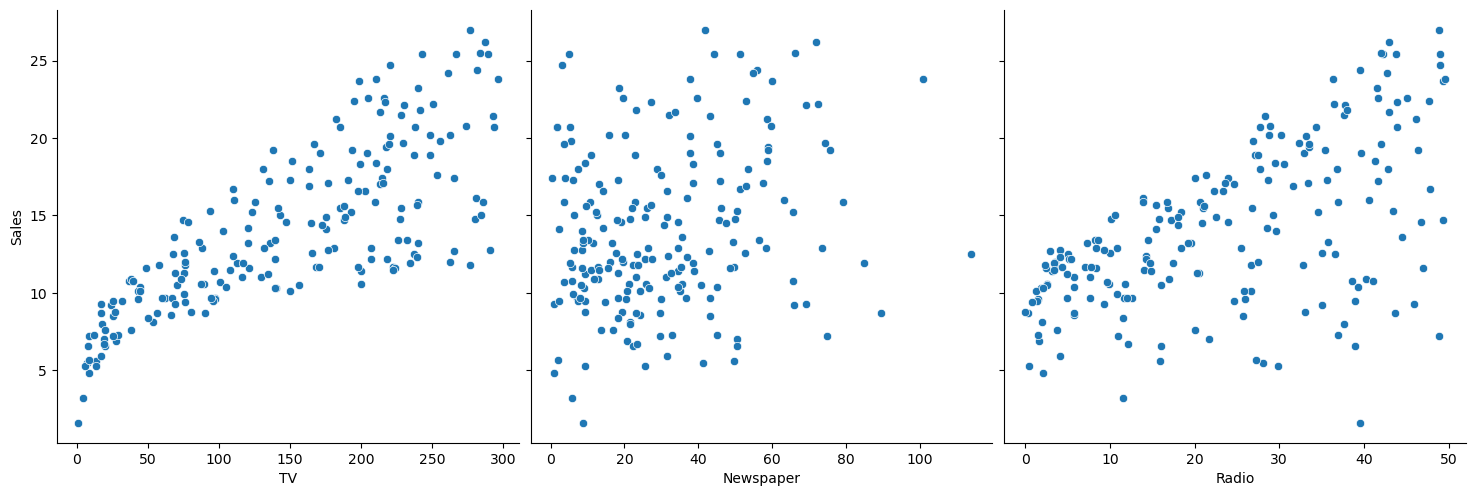

In [11]:
sns.pairplot(sales_data, x_vars = ['TV', 'Newspaper','Radio'], y_vars = 'Sales', size = 5, aspect = 1, kind = 'scatter')
plt.show()

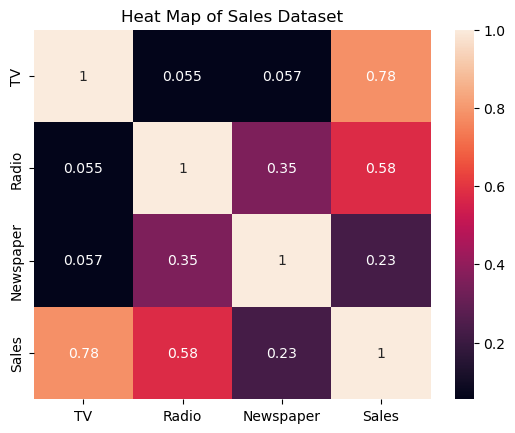

In [12]:
sns.heatmap(sales_data.corr(), annot = True)
plt.title("Heat Map of Sales Dataset")
plt.show()

<Axes: xlabel='TV', ylabel='Density'>

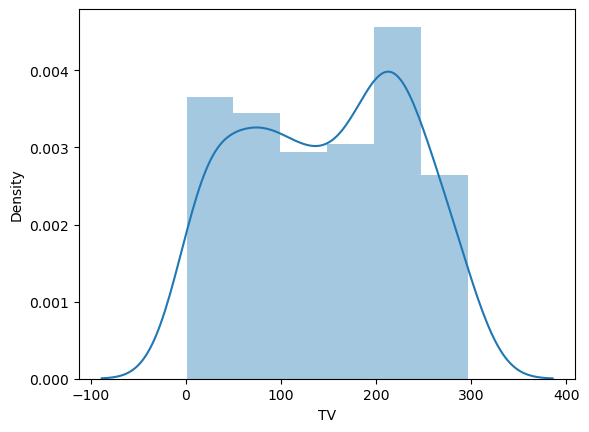

In [13]:
sns.distplot(sales_data.TV)

<Axes: xlabel='Radio', ylabel='Density'>

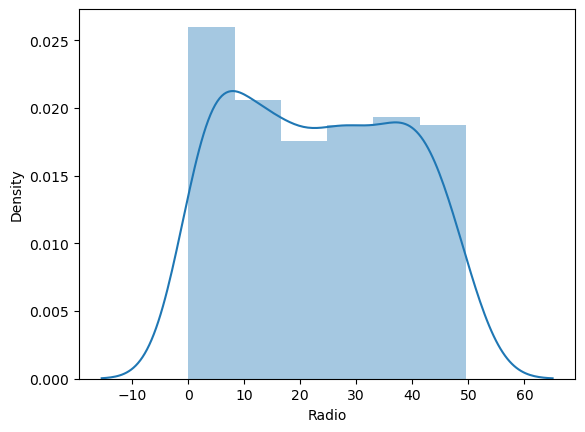

In [14]:
sns.distplot(sales_data.Radio)

<Axes: xlabel='Newspaper', ylabel='Density'>

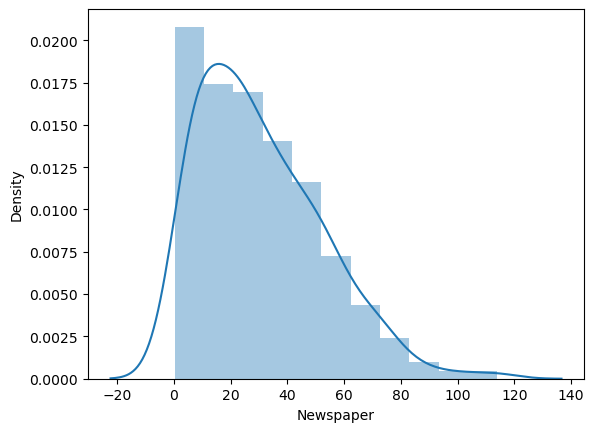

In [15]:
sns.distplot(sales_data.Newspaper)

<Axes: xlabel='Sales', ylabel='Density'>

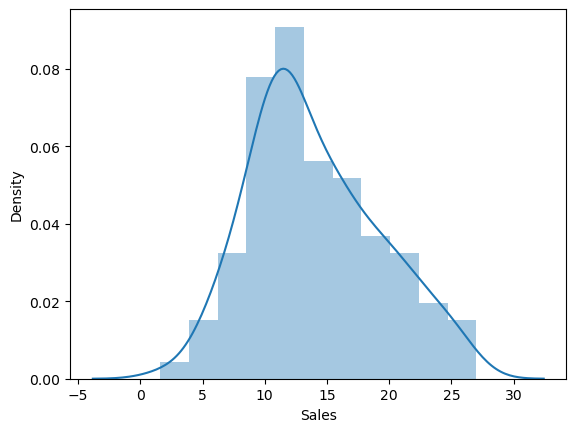

In [16]:
sns.distplot(sales_data.Sales)

## Feature Selection

In [17]:
X = sales_data.drop(columns = 'Sales', axis = 1)
Y = sales_data['Sales']

In [18]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 20)

In [22]:
print(f"X_train Shape is : {X_train.shape}")
print(f"X_test Shape is : {X_test.shape}")
print(f"Y_train Shape is : {Y_train.shape}")
print(f"Y_test Shape is : {Y_test.shape}")

X_train Shape is : (140, 3)
X_test Shape is : (60, 3)
Y_train Shape is : (140,)
Y_test Shape is : (60,)


## Incorporating Machine Learning Algorithms

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, Y_train)

LinearRegression()

In [26]:
prediction = model.predict(X_test)
prediction

array([17.96608868, 19.1997377 ,  9.0111069 , 15.55619518, 19.46246422,
       17.05922726, 12.09692612,  8.34473812, 21.62975941,  5.73003159,
       12.06983133, 14.04389523, 17.07081046, 11.45556076, 20.78320683,
       24.60891245,  5.83166235, 13.16249899,  8.36390598,  4.89524227,
       19.7892101 , 16.28849844, 17.29878585, 23.19655117, 20.84927704,
        8.90828202, 14.91003685, 11.24392212, 13.19715001, 15.3050095 ,
        7.72821324, 19.78613939,  9.41817976, 10.94073342, 23.8769123 ,
       15.09614864, 10.29705254,  9.09217209, 11.97324787, 13.84999355,
       16.30071518, 12.12194608, 19.18769242, 18.06856111, 13.51058739,
       18.2742912 , 13.48152824, 13.35165101, 21.01917496, 11.13171383,
       11.16365802,  8.21541903,  9.52770803, 18.34720107, 12.02079148,
       12.88451603, 21.37661567, 11.81392393, 11.02689706, 17.25717112])

In [27]:
model.intercept_

3.407990314237381

In [28]:
model.coef_

array([ 0.04239408,  0.19456989, -0.00125515])

## Testing the Model

In [29]:
accuracy_score = model.score(X_test, Y_test)*100
print(f"Accuracy of Sales Prediction Model is : {accuracy_score}")

Accuracy of Sales Prediction Model is : 85.6854287004272
